# *Guideline*

## *Imports* mais comuns

In [12]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import all_estimators
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score,f1_score, recall_score, jaccard_score, precision_recall_curve, roc_curve, det_curve, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import random
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector

## Leitura dos dados

In [13]:
# Correr apenas
def data_reading(datasets_number, *args):
    dict = {}
    if datasets_number <= 0:
        print("Number of datasets must be at least 1.")
    else:
        print("Reading...\n")
        for dataset in args:
            if datasets_number == 1:
                path_train = f"../Input/{dataset}"
                train_data = pd.read_csv(path_train)
                dict[0] = train_data
                print("Train data successfully read.\n")
            if datasets_number == 2:
                path_test = f"../Input/{args[dataset]}"
                test_data = pd.read_csv(path_test)
                dict[1] = test_data
                print("Test data successfully read.\n")
            if datasets_number == 3:
                path_valid = f"../Input/{args[dataset]}"
                valid_data = pd.read_csv(path_valid)
                dict[2] = valid_data
                print("Validation data successfully read.\n")
    return dict

In [14]:
"""
Inserir o(s) dataset(s) necessários na diretoria "input", no formato .csv;
- datasets_number: número de datasets a ler (se, p.ex, existir um dataset de treino e teste, então, é 2);
- *args: nome dos datasets em argumentos separados (começando em treino, depois teste e depois validação);
"""

datasets_number = 1 # Vamos trabalhar apenas com dataset de treino, alterar consoante necessidade
train_data = "titanic_dataset.csv"
# test_data = "teste.csv", alterar consoante necessidade
# valid_data = "valid.csv", alterar consoante necessidade

"""
Retorna um dicionário com: 
{
    0 : dataframe de treino
    1 : dataframe de teste
    2 : dataframe de validação
}
"""
dict = data_reading(datasets_number, train_data)
# data_reading(datasets_number, train_data, test_data, valid_data), alterar consoante necessidade

train_df = dict[0] # dataset de treino
# test_df = dict[1] # dataset de teste
# valid_df = dict[2] # dataset de validação

Reading...

Train data successfully read.



## Visualização e Exploração dos dados
Neste exemplo, realizamos uma exploração para o dataset de treino, todavia, deve alterar-se o dataframe consoante a preferência.

In [38]:
dataset = "treino" # alterar o nome consoante o caso
dataframe = train_df # alterar consoante o caso
print("\033[92m {}\033[00m" .format(f"Dataset de {dataset}:"))
print("\033[93m {}\033[00m" .format("Características Gerais:\n"))
dataframe.head()

 Dataset de treino:
 Características Gerais:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
print("\033[93m {}\033[00m" .format("Describe:\n"))
dataframe.describe()

 Describe:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
print("\033[93m {}\033[00m" .format("Info:\n"))
dataframe.info()

 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
print("\033[93m {}\033[00m" .format("Columns:\n"))
dataframe.columns

 Columns:



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
print("\033[93m {}\033[00m" .format("Shape:\n"))
dataframe.shape

 Shape:



(891, 12)

In [43]:
print("\033[93m {}\033[00m" .format("Ocorrências de cada valor:"))
# criar um ficheiro "occurencies" para ver os valores de ocorrências
filename = f"occorrencies_{dataset}.txt"
with open(f"../Output/{filename}", "w+") as f:
    # Iterar sobre as colunas do DataFrame
    for column in dataframe.columns:
        f.write("Column: " + str(column))
        f.write("\n")
        # Adicionar uma coluna à tabela com as contagens de valores da coluna atual
        f.write(str(dataframe[column].value_counts()))
        f.write("\n")
        f.write("-"*50)
        f.write("\n")
print(" Ver ficheiro occorrencies_train.txt na diretoria \"Output\".\n")

 Ocorrências de cada valor:
 Ver ficheiro occorrencies_train.txt na diretoria "Output".



In [44]:
print("\033[93m {}\033[00m" .format("Pandas Profiling:\n"))
prof = ProfileReport(dataframe)
prof.to_file(output_file=f"../Output/pandas_profiling_{dataset}.html")
print("Abrir o ficheiro html gerado no browser.")

 Pandas Profiling:



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Abrir o ficheiro html gerado no browser.


 Pairplot:



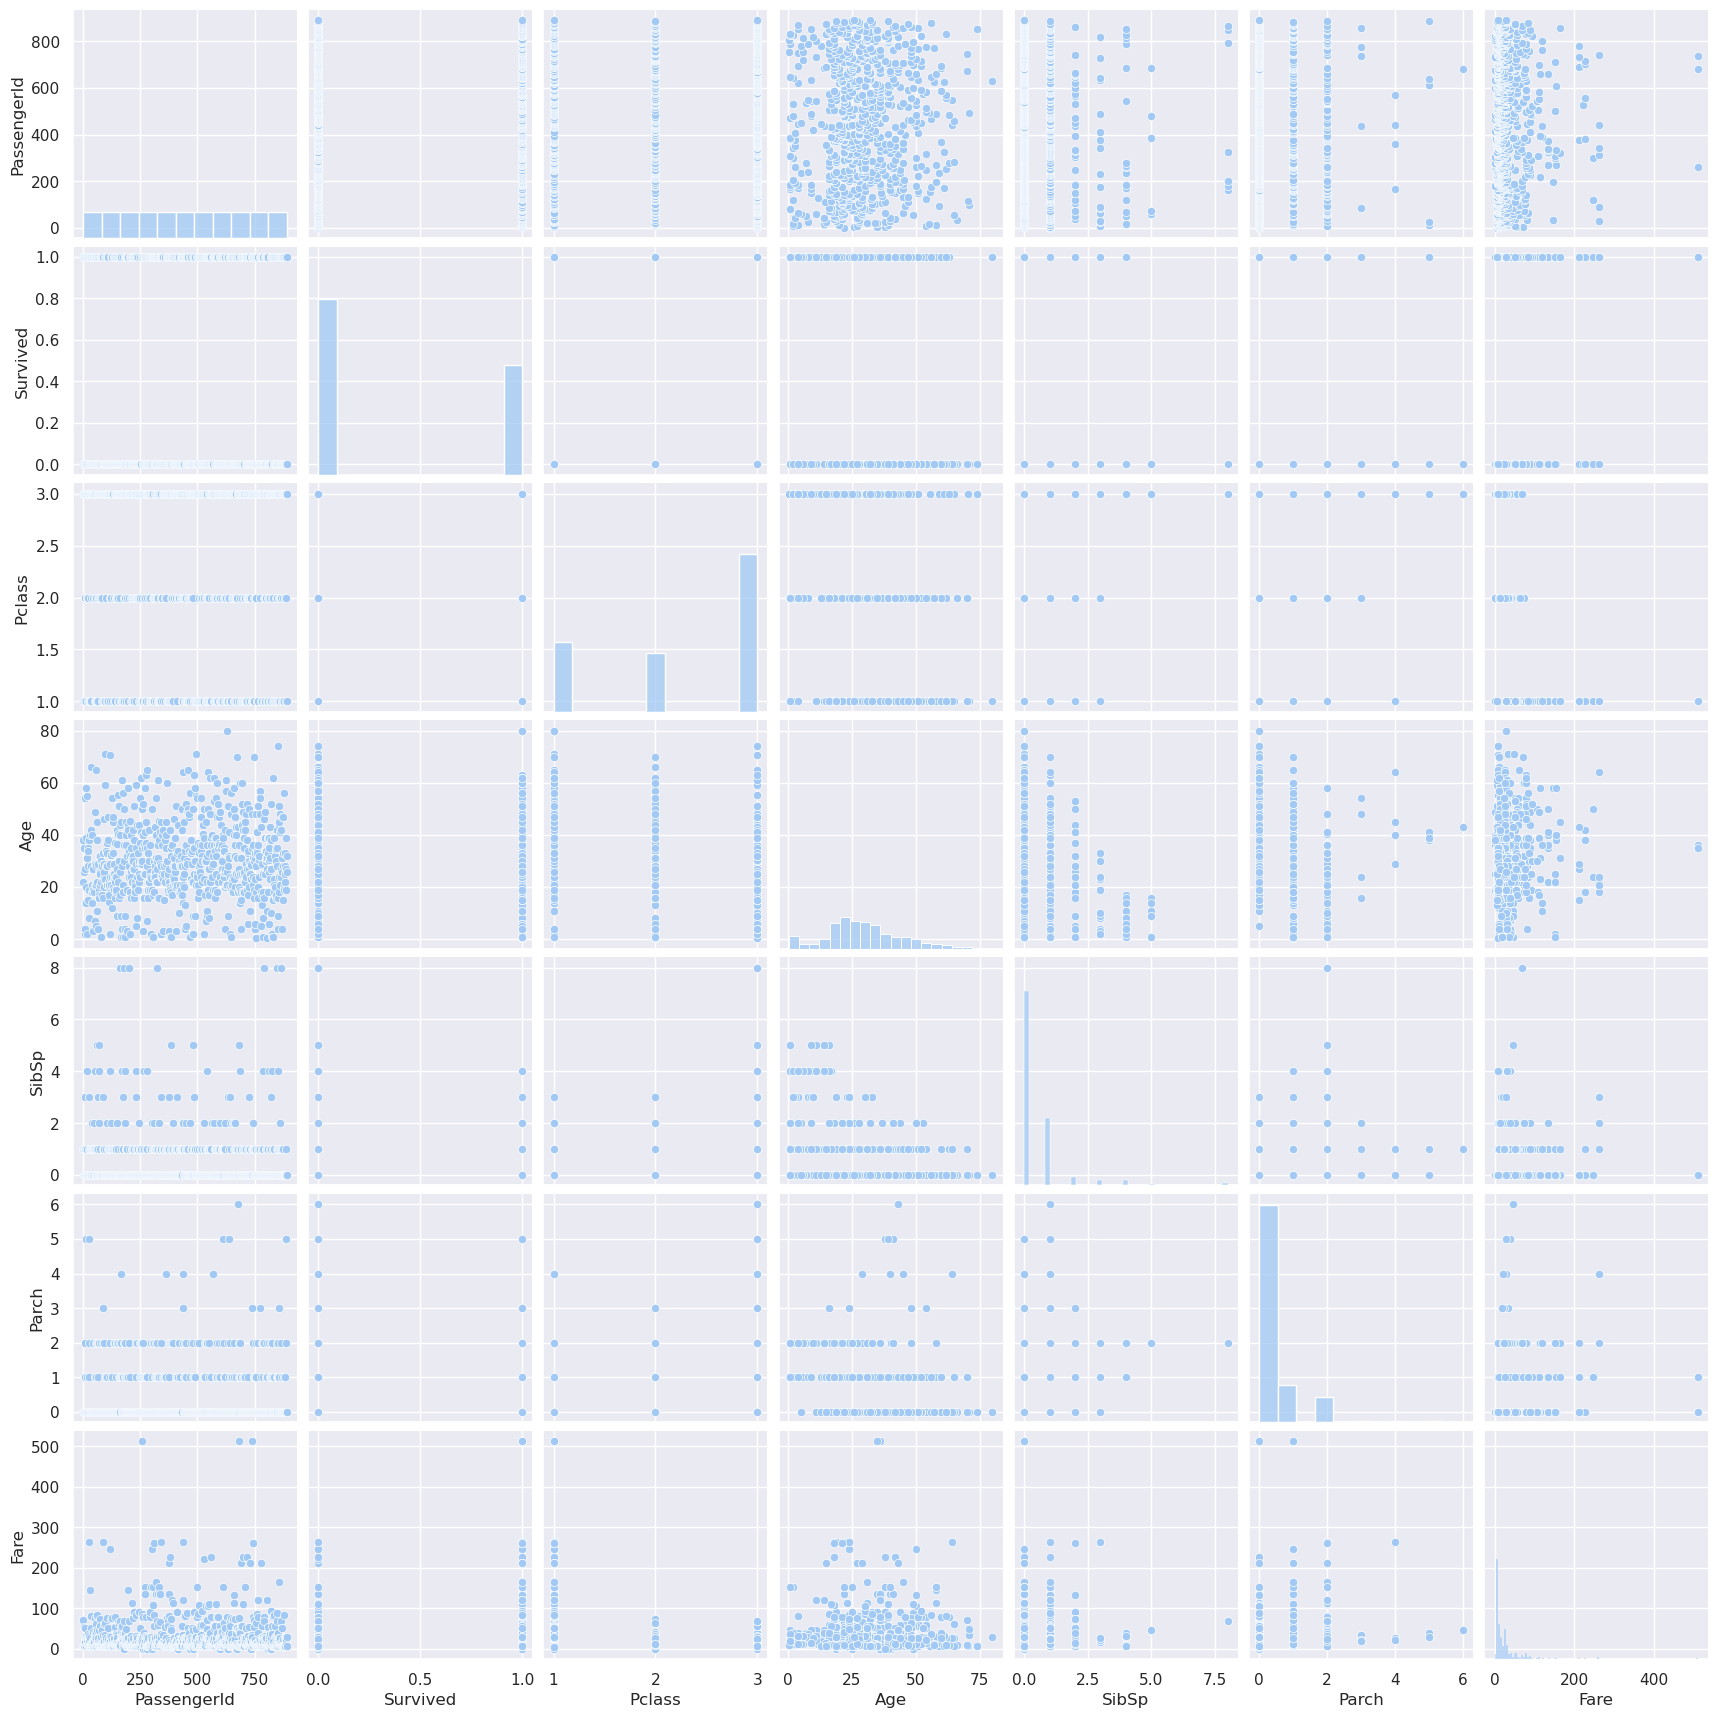

In [45]:
sns.set_theme(palette="pastel")
print("\033[93m {}\033[00m" .format("Pairplot:\n"))
sns.pairplot(dataframe)

 Missing Data:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


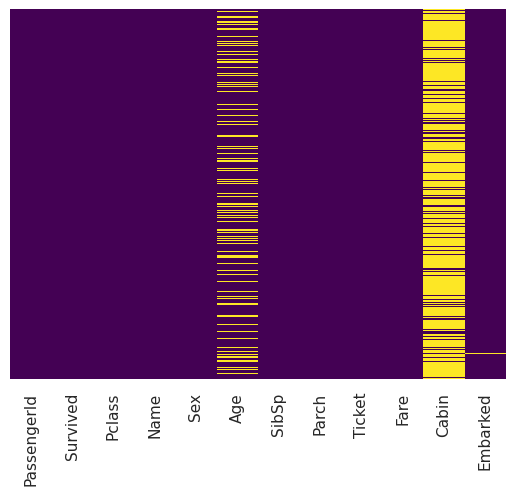

In [46]:
print("\033[93m {}\033[00m" .format("Missing Data:\n"))
sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
print(dataframe.isna().sum()) # Contagem dos valores em falta do dataset

 Outliers:



<AxesSubplot: >

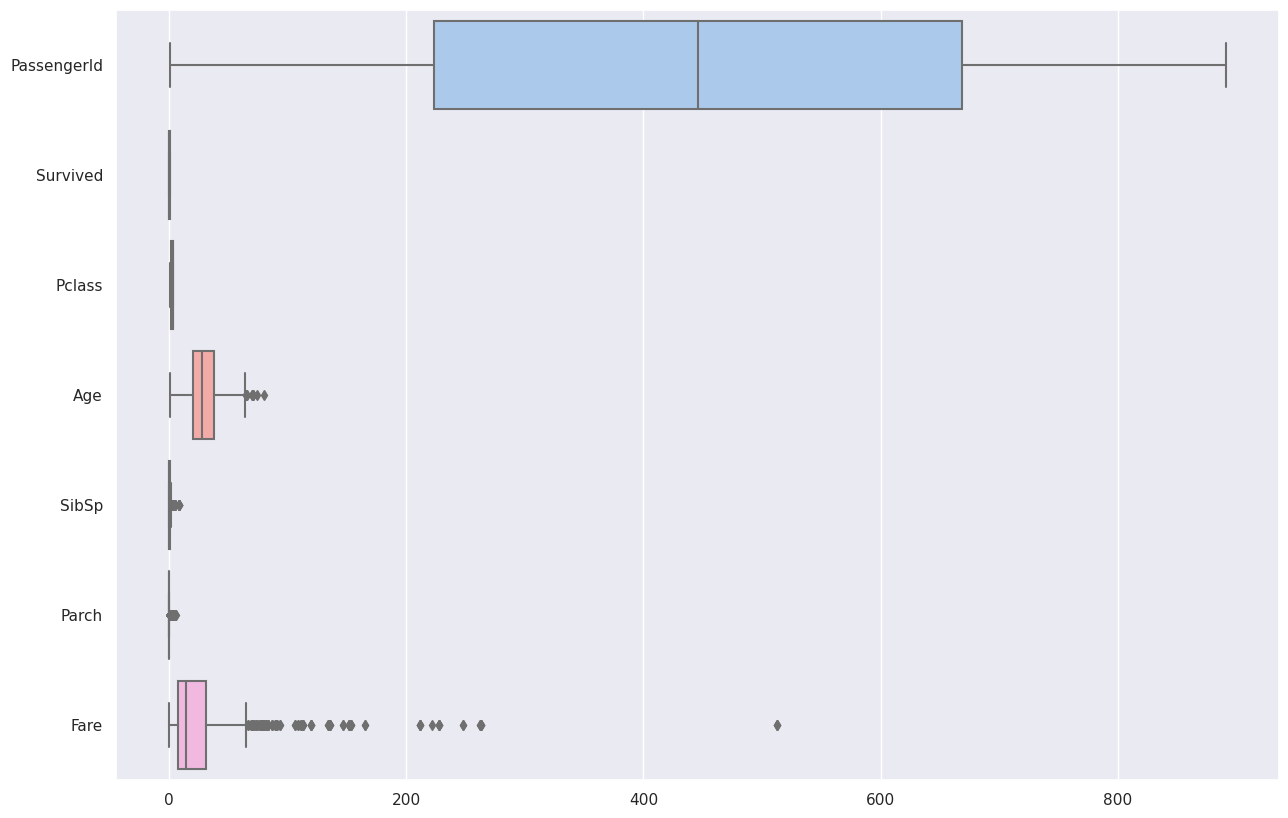

In [47]:
print("\033[93m {}\033[00m" .format("Outliers:\n"))
plt.figure(figsize= (15,10))
sns.boxplot(data=dataframe,orient ="h")

In [134]:
def identify_outliers(df, method):
    numerical_columns = df.select_dtypes(include=['float', 'int']).columns
    outliers_percentage = {}
    
    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10,len(numerical_columns)*5))
    
    if method == 'MAD':
        for i, col in enumerate(numerical_columns):
            median = df[col].median()
            mad = df[col].mad()
            outliers = df[(df[col] - median).abs() > 3 * mad]
            outliers_percentage[col] = 100 * len(outliers) / len(df)
            axes[i].boxplot(df[col])
            axes[i].set_title(f"{col} ({len(outliers)} outliers, {outliers_percentage[col]:.2f}%)")
    elif method == 'IQR':
        for i, col in enumerate(numerical_columns):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
            outliers_percentage[col] = 100 * len(outliers) / len(df)
            axes[i].boxplot(df[col])
            axes[i].set_title(f"{col} ({len(outliers)} outliers, {outliers_percentage[col]:.2f}%)")
    elif method == 'Z-Score':
        for i, col in enumerate(numerical_columns):
            mean = df[col].mean()
            std = df[col].std()
            outliers = df[(np.abs(df[col] - mean) > 3 * std)]
            outliers_percentage[col] = 100 * len(outliers) / len(df)
            axes[i].boxplot(df[col])
            axes[i].set_title(f"{col} ({len(outliers)} outliers, {outliers_percentage[col]:.2f}%)")
    else:
        raise ValueError("Método deve ser 'MAD', 'IQR', ou 'Z-Score'")
    plt.tight_layout()
    plt.show()

 Identificação de outliers :



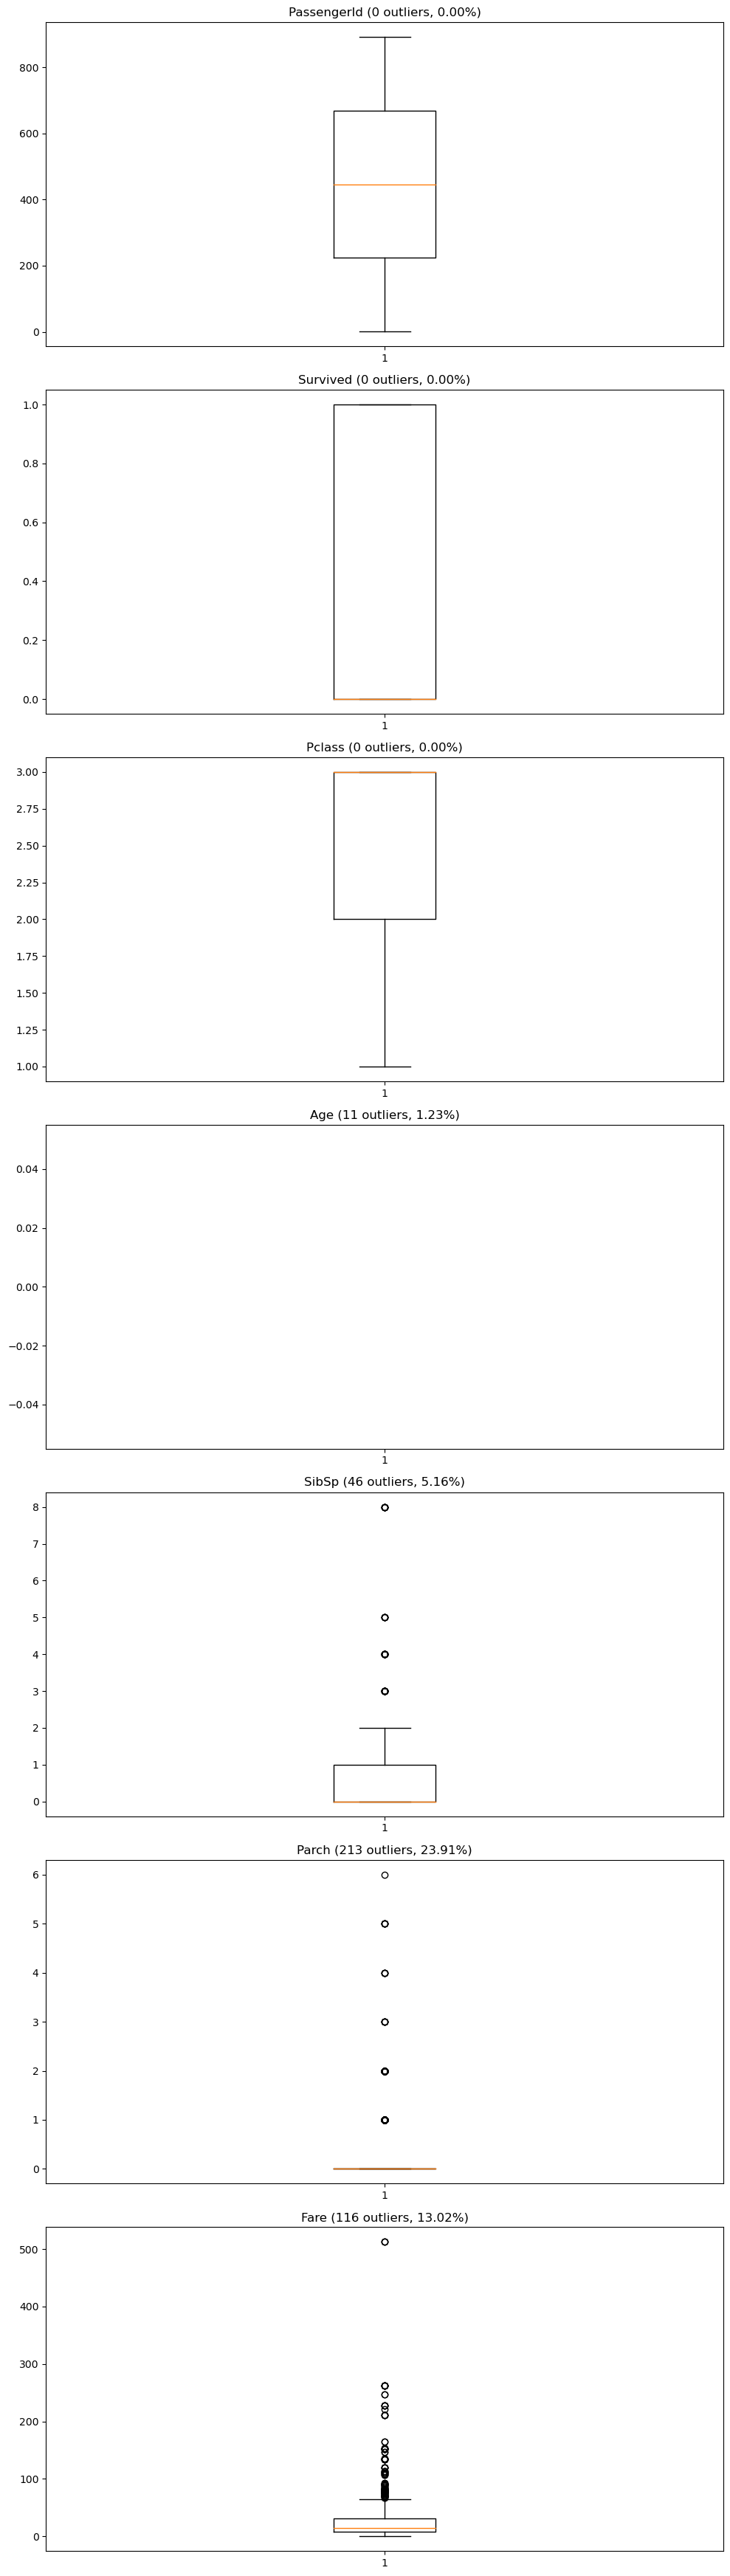

In [135]:
"""
Método de identificação de outliers:
- method: método a utilizar para identificar os outliers ("MAD", "IQR", "Z-SCORE");
- dataframe_to_identify: dataframe a utilizar na identificação;
"""
dataframe_to_identify = train_df # alterar consoante necessidade
method = "IQR" # alterar consoante necessidade

# Não alterar
print("\033[93m {}\033[00m" .format("Identificação de outliers :\n"))
identify_outliers(dataframe_to_identify, method)

 Correlação:



<AxesSubplot: >

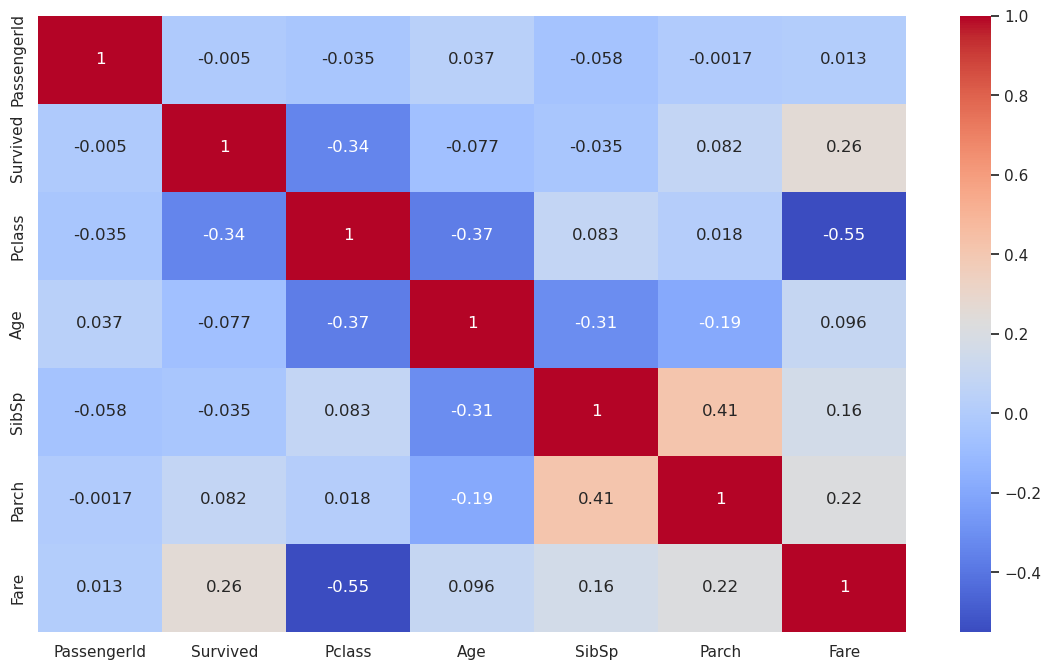

In [50]:
print("\033[93m {}\033[00m" .format("Correlação:\n"))
plt.subplots(figsize=(10,8))
sns.heatmap(dataframe.corr(), annot = True, cmap='coolwarm')

## Tratamento/Processamento dos dados

### Transformação de categorias para números

In [15]:
def encode(df, encoder):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    df_encoded = df.copy()
    for col in categorical_columns:
        df_encoded[col] = encoder.fit_transform(df[[col]])

    return df_encoded

In [16]:
"""
Alterar os valores abaixo, consoante a necessidade.
- original_df_to_convert: dataframe original a converter (train_df, test_df, valid_df)
- encoder: encoder a utilizar (Método do sklearn: OrdinalEncoder(), OneHotEncoder(), ...)
"""
original_df_to_convert = train_df # alterar consoante necessidade
encoder = OrdinalEncoder() # alterar para o encoder solicitado

# Não alterar
encoded_df = encode(original_df_to_convert,encoder)
print("\033[93m {}\033[00m" .format("Transformação de Valores Categóricos para Numéricos:\n"))
print(f" Utilizou-se o {encoder}, use o dataframe encoded_df resultante.\n")

 Transformação de Valores Categóricos para Numéricos:

 Utilizou-se o OrdinalEncoder(), use o dataframe encoded_df resultante.



In [17]:
encoded_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,NaN,2.0


### Identificação de Colunas denecessárias

In [18]:
# Correr apenas
def features_to_remove(df):
    drop_columns = []
    for col in df.columns:
        if df[col].nunique() == 0 or df[col].nunique() == len(df[col]):
            drop_columns.append(col)
    df.drop(columns=drop_columns, inplace=True)
    return df

In [19]:
"""
Alterar os valores abaixo, consoante a necessidade.
- original_df_to_clean: dataframe a limpar (train_df, test_df, valid_df, encoded_df, ...)
"""
original_df_to_clean = encoded_df # alterar consoante a necessidade

# Não alterar
clean_df = features_to_remove(original_df_to_clean)
print("\033[93m {}\033[00m" .format("Remoção de Ids ou Colunas redundantes:\n"))
print(f" Use o dataframe clean_df resultante.\n")

 Remoção de Ids ou Colunas redundantes:

 Use o dataframe clean_df resultante.



In [20]:
clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,NaN,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,NaN,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,NaN,2.0


### Tratamento Missing Data

#### Por percentagem

In [21]:
# Correr apenas
def treat_missing_data_by_percentage(df, method, percentage, *features):
    new_df = df.copy()
    methods = ["remove", "median", "mean", "mode"]
    if (len(features) == 0) or (percentage > 100) or (percentage < 0) or (method not in methods):
       raise ValueError("Erro. Argumentos: <dataframe>, <método (remove/median/mean/mode)>, <percentagem (0 - 100)>, <feature1, feature2, ...>")

    if method == "remove":
        for col in features:
            if col not in new_df.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue
            if new_df[col].isna().any() == False:
                print("A coluna selecionada não possui missing data. Continuando...")
                continue
            print(f"A preparar remoção de {col}.")
            percentage_missing = ((new_df[col].isna().sum())/len(new_df[col].isna()))*100
            if percentage_missing >= percentage:
                new_df.drop(new_df[[col]], axis=1, inplace = True)
                print(f"{col} removida.")
            else:
                print("Percentagem de Missing Data é inferior à especificada.")
    elif method in methods:
        for col in features:
            if col not in new_df.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue
            if new_df[col].isna().any() == False:
                print("A coluna selecionada não possui Missing Data.")
            else:
                print(f"A preparar substituição pela {method} de {col}.")
                percentage_missing = ((new_df[col].isna().sum())/(len(new_df[col].isna()))) * 100
            if percentage_missing >= percentage:
                if method == methods[1]: 
                    metric = new_df[col].median()
                elif method == methods[2]: 
                    metric = new_df[col].mean()
                elif method == methods[3]:
                    metric = new_df[col].mode()[0]
                new_df[col] = new_df[col].fillna(metric)
                print(f"Missing Data da coluna {col} efetuada.")
            else:
                print("Percentagem de Missing Data é inferior à especificada.")
    return new_df

In [22]:
"""
Tratar missing values consoante a percentagem de ocorrência.
- dataframe: dataframe de aplicação (train_df, test_df, etc);
- method: método de tratamento ("remove", "median", "mean", "mode");
- percentage: percentagem de missing values a partir da qual é efetuada a remoção:
 - se pretender efetuar o tratamento sem ter em conta a percentagem, basta colocar a percentagem a 0;
- *features: array de fetures a tratar ("Feature1", "Feature2", etc)
 - É aplicado o mesmo método a todas as features passadas, caso se pretenda aplicar métodos diferentes,
deverá ser chamada a função com o método para cada feature individualmente:
Por exemplo, caso se pretenda tratar a feature1 pela média e a feature2 pela moda (sem ter em conta a percentagem), faz-se:
   - treat_missing_data_by_percentage(train_df, "mean", 0, "feature1")
   - treat_missing_data_by_percentage(train_df, "median", 0, "feature2")
- É devolvido uma cópia do dataset tratado.
"""

print("\033[93m {}\033[00m" .format("Tratamento de Missing Values:\n"))

dataframe = clean_df # alterar consoante a necessidade
method = "median" # alterar consoante a necessidade
percentage = 0 # alterar consoante a necessidade
# alterar as features consoante a necessidade
result_df = treat_missing_data_by_percentage(dataframe, method, percentage, "Age", "Cabin", "Embarked")
print(" Utilize o dataframe retornado.")

 Tratamento de Missing Values:

A preparar substituição pela median de Age.
Missing Data da coluna Age efetuada.
A preparar substituição pela median de Cabin.
Missing Data da coluna Cabin efetuada.
A preparar substituição pela median de Embarked.
Missing Data da coluna Embarked efetuada.
 Utilize o dataframe retornado.


In [23]:
print("\033[93m {}\033[00m" .format("Verificação de tratamento de missing data:\n"))
result_df.isna().sum()

 Verificação de tratamento de missing data:



Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Tratamento Outliers

In [24]:
# Correr apenas
def treat_outliers(df, method_of_identification, method_of_treatment, *features):
    new_df = df.copy()
    methods_of_treat = ["remove", "median", "mean", "mode"]
    methods_of_id = ["IQR", "MAD", "Z-SCORE"]

    if (len(features) == 0) or (method_of_identification not in  methods_of_id) or (method_of_treatment not in methods_of_treat):
        raise ValueError("Erro. Argumentos: <dataframe>, <método de identificação (IQR/MAD/Z-SCORE)>, <método de tratamento (remove/median/mean/mode)>, <feature1, feature2, ...>")
    
    if method_of_identification == "IQR":
        print(f"Método de identificação {method_of_identification} detetado.")
        for col in features:
            if col not in new_df.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue

            median = new_df[col].median()
            lower_quartile = new_df[col].quantile(0.25)
            upper_quartile = new_df[col].quantile(0.75)
            iqr = upper_quartile - lower_quartile

            # Find the rows with outliers
            outliers = new_df[(new_df[col] < lower_quartile - 1.5 * iqr) | (new_df[col] > upper_quartile + 1.5 * iqr)]
            indices = outliers.index
            #outliers_per = len(outliers)/len(new_df[col] * 100)

            # Process the outliers according to the specified method
            if method_of_treatment == "remove":
                new_df = new_df.drop(indices)
                print(f"Outliers de {col} tratados por remoção.")
            elif method_of_treatment == "median":
                new_df.loc[indices, col] = median
                print(f"Outliers de {col} tratados por mediana.")
            elif method_of_treatment == "mode":
                new_df.loc[indices, col] = new_df[col].mode()[0]
                print(f"Outliers de {col} tratados por moda.")
            elif method_of_treatment == "mean":
                new_df.loc[indices, col] = new_df[col].mean()
                print(f"Outliers de {col} tratados por média.")
    elif method_of_identification == "MAD":
        print(f"Método de identificação {method_of_identification} detetado.")
        # Use MAD to detect outliers
        for col in features:
            if col not in new_df.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue

            median = new_df[col].median()
            mad = np.mean(np.abs(new_df[col] - median))

            # Find the rows with outliers
            outliers = new_df[(new_df[col] - median).abs() > 3*mad]
            indices = outliers.index

            # Process the outliers according to the specified method
            if method_of_treatment == "remove":
                new_df = new_df.drop(indices)
                print(f"Outliers de {col} tratados por remoção.")
            elif method_of_treatment == "median":
                new_df.loc[indices, col] = median
                print(f"Outliers de {col} tratados por mediana.")
            elif method_of_treatment == "mode":
                new_df.loc[indices, col] = new_df[col].mode()[0]
                print(f"Outliers de {col} tratados por moda.")
            elif method_of_treatment == "mean":
                new_df.loc[indices, col] = new_df[col].mean()
                print(f"Outliers de {col} tratados por média.")
    elif method_of_identification == "Z-SCORE":
        print(f"Método de identificação {method_of_identification} detetado.")
        for col in features:
            if col not in new_df.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue
            mean = new_df[col].mean()
            std = new_df[col].std()
            outliers = new_df[(np.abs(new_df[col] - mean) > 3 * std)]
            indices = outliers.index

             # Process the outliers according to the specified method_of_treatment
            if method_of_treatment == "remove":
                new_df = new_df.drop(indices)
                print(f"Outliers de {col} tratados por remoção.")
            elif method_of_treatment == "median":
                new_df.loc[indices, col] = median
                print(f"Outliers de {col} tratados por mediana.")
            elif method_of_treatment == "mode":
                new_df.loc[indices, col] = new_df[col].mode()[0]
                print(f"Outliers de {col} tratados por moda.")
            elif method_of_treatment == "mean":
                new_df.loc[indices, col] = new_df[col].mean()
                print(f"Outliers de {col} tratados por média.")
    return new_df

In [25]:
"""
Tratar outliers com métodos de identificação e tratamento variáveis.
- dataframe: dataframe de aplicação (train_df, test_df, result_df, etc.);
- method_of_identification: método de identificação de outliers ("IQR" - usa a distância interquartil, "MAD" - usa o método Mean Absolute Deviaction, "Z-SCORE" - usa o método Z-Score);
- method_of_treatment: método de tratamento ("remove", "median", "mean", "mode");
- *features: array de fetures a tratar ("Feature1", "Feature2", etc)
 - É aplicado o mesmo método a todas as features passadas, caso se pretenda aplicar métodos diferentes,
deverá ser chamada a função com o método para cada feature individualmente:
Por exemplo, caso se pretenda identificar os outliers pela IQR e tratar a feature1 pela média e a feature2 pela moda, faz-se:
   - treat_outliers(train_df, "IQR", "mean", "feature1")
   - treat_outliers(train_df, "IQR", "median", "feature2")
- É devolvido uma cópia do dataset tratado.
"""

print("\033[93m {}\033[00m" .format("Tratamento de Outliers:\n"))

dataframe = result_df # alterar consoante a necessidade
method_of_identification = "IQR" # alterar consoante a necessidade
method_of_treatment = "median" # alterar consoante a necessidade
# alterar as features consoante a necessidade
df_without_outliers = treat_outliers(dataframe, method_of_identification, method_of_treatment, "SibSp", "Parch", "Fare", "Age", "Cabin")
print(" Utilize o dataframe retornado.")

 Tratamento de Outliers:

Método de identificação IQR detetado.
Outliers de SibSp tratados por mediana.
Outliers de Parch tratados por mediana.
Outliers de Fare tratados por mediana.
Outliers de Age tratados por mediana.
Outliers de Cabin tratados por mediana.
 Utilize o dataframe retornado.


 Verificação de tratamento de outliers :



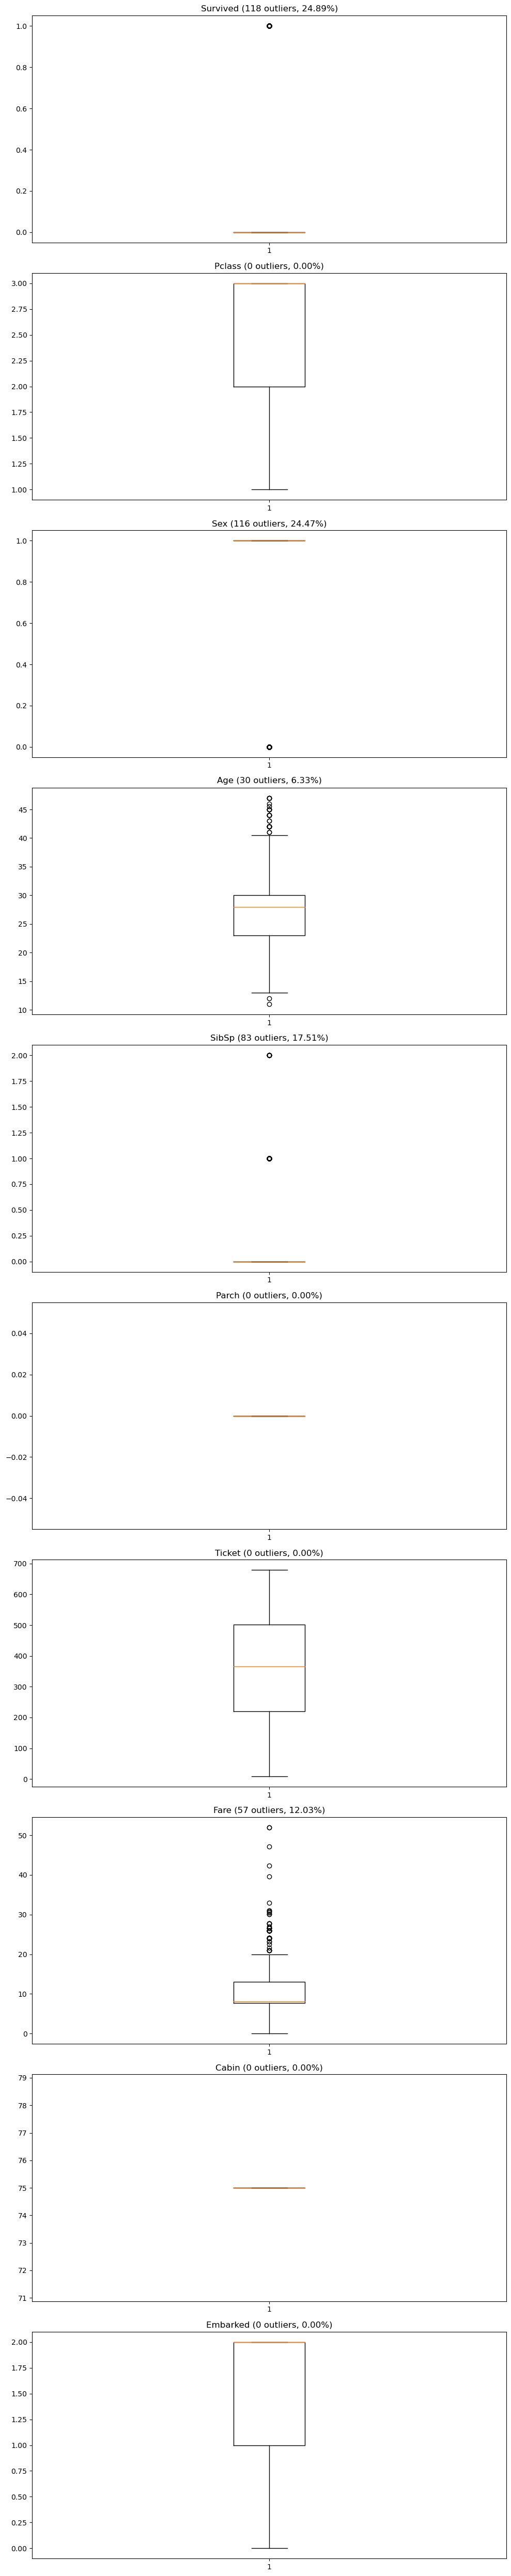

In [153]:
# Verificar que os outliers foram tratados
print("\033[93m {}\033[00m" .format("Verificação de tratamento de outliers :\n"))
identify_outliers(df_without_outliers, "IQR")

### Transformações

In [26]:
# Correr apenas
def transform(df, method, range=None, *features):
    df_norm = df.copy()
    methods = ["clipping", "scaling-to-range", "log-scaling", "z-score"]
    if (len(features) == 0) or (method not in methods):
        raise ValueError("Erro. Argumentos: <dataframe>, <método (normalize/clipping/scaling_to_range/log_scaling/z-score)>, range (tuplo: (min,max)), <feature1, feature2, ...>")
    if method in ["clipping", "scaling-to-range"] and (range is None or type(range) is not tuple):
        raise ValueError("Erro. Para o método 'clipping' ou 'scaling-to-range' é necessário um tuplo de range: (min, max)")
    
    if method == "scaling-to-range":
        min,max = range
        for col in features:
            if col not in df_norm.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue

            scaler = MinMaxScaler(feature_range=(min,max))
            df_norm[[col]] = scaler.fit_transform(df_norm[[col]])
            print(f"Aplicação de {method}.\n")
    elif method == "log-scaling":
        for col in features:
            if col not in df_norm.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue

            df_norm[col] = np.log1p(df_norm[col])
            print(f"Aplicação de {method}.\n")
    elif method == "z-score":
        for col in features:
            if col not in df_norm.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue

            scaler = StandardScaler()
            df_norm[[col]] = scaler.fit_transform(df_norm[[col]])
            print(f"Aplicação de {method}.\n")
    elif method == "clipping":
        min,max = range
        for col in features:
            if col not in df_norm.columns:
                print("Coluna especificada não consta no dataframe. Continuando...")
                continue
            
            df_norm[col] = df_norm[col].clip(lower=min,upper=max)
            print(f"Aplicação de {method}.\n")
    return df_norm


In [27]:
"""
A função assume que as features passadas estão no formato numérico, se não estiverem, deve ser chamada a função encode().
Esta função efetua a transformação consoante o método passado como parâmetro.
- df: dataframe onde a transformação será aplicada;
- method: método a aplicar (clipping, scaling-to-range, log-scaling, z-score);
    - scaling-to-range: consiste em calcular novos valores da feature de modo a que esteja num intervalo a especificar;
    - log-scaling: aplicar transformações logaritmicas aos valores da feature;
    - z-score: aplicar transformações de modo a garantir que mean = 0 and std = 1;
- range: tuplo que define o range do scaling. Pode ser mudado consoante a necessidade. (None, (0,1), (30,90), etc.)
É obrigatório à excessão dos métodos z-score e log-scaling. Se range não for especificado (None) quando chamar a função, assume-se 
que a transformação é z-score e log-scaling.

Desta forma as normalizações podem ser efetuadas dentro do intervalo mais cómodo ao utilizador.
Retorna-se o dataframe transformado.
É aplicada a mesma transformação a todas as features passadas, pelo que, se se pretender aplicar transformações diferentes, 
deve ser chamada a função mais do que uma vez, para cada feature, como se fez anteriormente.
"""

dataframe= df_without_outliers # alterar consoante necessidade
method = "clipping" # alterar consoante necessidade
range = (30,90) # alterar consoante necessidade
scaled_df = transform(dataframe, method, range, "Age")

Aplicação de clipping.



In [28]:
# exemplo sem especificação do range
scaled_df_2 = transform(scaled_df,"z-score",None, "SibSp")

Aplicação de z-score.



## Modelação

### Divisão

In [29]:
model_df = scaled_df_2 # dataframe de treino, alterar consoante necessidade
target = "Survived" # nome da coluna do targe, alterar consoante necessidade
TEST_SIZE = 0.20 # proporção de teste/treino, alterar consoante necessidade
RANDOM = 42 # estado aleatório, alterar consaonte necessidade (evita diferentes outputs)
problem_type = "classifier" # não alterar, este guião é apenas para classificação
CV = 5 # cv folds, alterar consoante necessidade

x = model_df.drop([target], axis=1)
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM)

print("\033[93m {}\033[00m" .format(f"TARGET: {target}\n"))
print("\033[93m {}\033[00m" .format(f"TEST_SIZE: {TEST_SIZE}\n"))
print("\033[93m {}\033[00m" .format(f"PROBLEM: {problem_type}\n"))
print("\033[93m {}\033[00m" .format(f"Use X_train, X_test, y_train, y_test.\n"))

 TARGET: Survived

 TEST_SIZE: 0.2

 PROBLEM: classifier

 Use X_train, X_test, y_train, y_test.



## Feature Selection

In [55]:
# Correr apenas
# Obter importância
def get_importance(model_classifier, X_train, y_train):
    if model_classifier is None:
        raise ValueError("Erro. Argumentos: <modelo (ex: ExtraTreeClassifier()), <X_train>, <y_train>.")

    model = model_classifier
    model.fit(X_train,y_train)
    print(model.feature_importances_)

    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()

    print(X_train.columns)

# Obter filtering
def get_filtering(X_train, y_train):
    sel=SelectKBest(mutual_info_classif, k=5).fit(X_train,y_train)
    report = list(X_train.columns[sel.get_support()])
    print(report)

# Obter wrapper
def get_wrapper(model,X_train, y_train):
    if model is None:
        raise ValueError("Erro. Argumentos: <modelo (ex: ExtraTreeClassifier()), <X_train>, <y_train>.")

    print("Sequential Forward Selection:")
    feature_selector = SequentialFeatureSelector(model,
    k_features=5,
    forward=True,
    floating=False,
    verbose=2,
    scoring='roc_auc',
    cv=4)
    sfs1 =feature_selector.fit(X_train,y_train)
    print(sfs1.k_feature_idx_)
    print(X_train.columns[list(sfs1.k_feature_idx_)])
    print("\n")

    print("Sequential Backward Elimination:")
    sfs2 = SequentialFeatureSelector(model, 
    k_features=5, 
    forward=False, 
    floating=False, 
    verbose=2,
    scoring='r2',
    cv=3)
    sfs2 = sfs2.fit(X_train, y_train)
    print(sfs2.k_feature_idx_)
    print(X_train.columns[list(sfs2.k_feature_idx_)])


# Obter embedded
def get_embedded(X_train, y_train, X_test,y_test):
    print("Scaling...")
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print("Linear Regression: ")
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    print('Training score (R²): {}'.format(lm.score(X_train,y_train)))
    print('Test score (R²): {}'.format(lm.score(X_test,y_test)))
    y_pred = lm.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    lm_coef = lm.coef_
    print(f"LM_COEF: {lm_coef}.")
  
    print("LASSO regularization L1:")
    lasso_reg = Lasso(alpha=0.3, fit_intercept=True)
    lasso_reg.fit(X_train,y_train)
    print('Training score (R²): {}'.format(lasso_reg.score(X_train,y_train)))
    print('Test score (R²): {}'.format(lasso_reg.score(X_test,y_test)))
    lasso_coef = lasso_reg.coef_
    print(f"LASSO_COEF: {lasso_coef}.")

# função principal de seleção de features
def feature_selection(method, X_train, y_train, model=None):
    if (method not in ["wrapper", "importance", "filter", "embedded"]):
        raise ValueError("Erro. Argumentos: <método (wrapper/importance/filter/embeded)>, <X_train>, <y_train>, <Modelo/teste>.")
    
    if method == "importance":
        if (method == "importance" and model is None):
            raise ValueError("Erro. Para a importância, deve passar o parâmetro com o modelo.")

        print(f"Aplicando feature-{method} com {model}.")
        model_classifier = model
        get_importance(model_classifier,X_train, y_train)
    elif method == "filter":
        print(f"Aplicando {method}ing.")
        get_filtering(X_train, y_train)
    elif method == "wrapper":
        model_classifier = model
        get_wrapper(model_classifier,X_train, y_train)
    elif method == "embedded":
        y_test = model[1]
        X_test = model[0]
        get_embedded(X_train, y_train,X_test,y_test)

Feature Selection:
Aplicando feature-importance com ExtraTreeClassifier().
[0.09689757 0.29977138 0.04509683 0.04199039 0.         0.32748673
 0.16788894 0.         0.02086816]


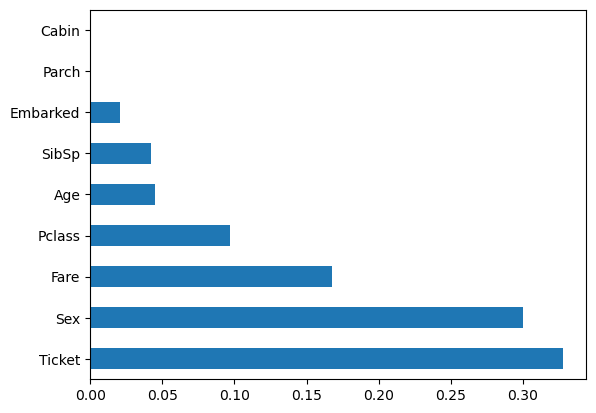

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [43]:
"""
Função de feature selection.
 - method: método de FS ("wrapper", "importance", "filter", "embedded").
 - Caso o método passado seja "wrapper", "embedded", "importance" o parâmetro seguinte deve ser diferente de None.
 - model: modelo ou porção y_test (se o método for "embedded", model = y_test; Se for "wrapper" ou "importance" é o modelo (p.ex: ExtraTreeClassifier()))
"""

method = "importance"
model = ExtraTreeClassifier()
X_treino = X_train
y_treino = y_train
print("\033[93m{}\033[00m" .format(f"Feature Selection:"))
feature_selection(method, X_treino, y_treino, model)

In [50]:
method = "filter"
model = None
X_treino = X_train
y_treino = y_train
print("\033[93m{}\033[00m" .format(f"Feature Selection:"))
feature_selection(method, X_treino, y_treino, model)

Feature Selection:
Aplicando filtering.
['Pclass', 'Sex', 'Parch', 'Ticket', 'Fare']


In [53]:
method = "wrapper"
model = ExtraTreeClassifier()
X_treino = X_train
y_treino = y_train
print("\033[93m{}\033[00m" .format(f"Feature Selection:"))
feature_selection(method, X_treino, y_treino, model)

Feature Selection:
Sequential Forward Selection:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-02-12 17:13:18] Features: 1/5 -- score: 0.7656144950921071[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-02-12 17:13:18] Features: 2/5 -- score: 0.824677289229528[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-02-12 17:13:18] Features: 3/5 -- score: 0.824677289229528[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

(0, 1, 4, 7, 8)
Index(['Pclass', 'Sex', 'Parch', 'Cabin', 'Embarked'], dtype='object')


Sequential Backward Elimination:
(0, 1, 4, 7, 8)
Index(['Pclass', 'Sex', 'Parch', 'Cabin', 'Embarked'], dtype='object')


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-02-12 17:13:18] Features: 8/5 -- score: -0.023170923732721522[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-02-12 17:13:18] Features: 7/5 -- score: 0.042760738266356256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-02-12 17:13:18] Features: 6/5 -- score: 0.17445760367108684[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-02-12 17:13:18] Features: 5/5

In [56]:
method = "embedded"
dados = [X_test, y_test] # para este caso, deve ser passada uma lista com as duas componentes.
X_treino = X_train
y_treino = y_train
print("\033[93m{}\033[00m" .format(f"Feature Selection:"))
feature_selection(method, X_treino, y_treino, dados)

Feature Selection:
Scaling...
Linear Regression: 
Training score (R²): 0.369107473190343
Test score (R²): 0.4116004344262544
Mean Absolute Error: 0.2900524295163322
Mean Squared Error: 0.1426879505791955
Root Mean Squared Error: 0.3777405863541744
LM_COEF: [-1.18350164e-01 -2.40164752e-01 -2.50588882e-02  1.86873428e-02
  4.16333634e-17 -1.65254321e-02  1.81606532e-03  0.00000000e+00
 -3.77531663e-02].
LASSO regularization L1:
Training score (R²): 0.0
Test score (R²): -0.005646334288551325
LASSO_COEF: [-0. -0.  0.  0.  0. -0.  0.  0. -0.].


### Treino, Previsão e Avaliação

In [21]:
# Alterar consoante necessidade
def train_and_predict(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    
    # Adicionar mais modelos, conforme preferência
    models = [LogisticRegression(random_state=RANDOM), 
    KNeighborsClassifier(), 
    DecisionTreeClassifier(random_state=RANDOM), 
    RandomForestClassifier(random_state=RANDOM), 
    GaussianNB(), SVC(kernel='linear')]

    # Adicionar o seu nome à lista
    model_names = ['Logistic Regression', 
    'KNN', 
    'Decision Tree', 
    'Random Forest', 
    'Naive Bayes', 
    'SVM']

    # Scale the features
    # Necessário para alguns modelos
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # DataFrame to store the results
    # Adicionar mais métricas, conforme necessidade
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Recall', 'Jaccard', 'Precision'])

    # Create a figure to plot the confusion matrices
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()

    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Adicionar mais métricas aqui
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        jaccard = jaccard_score(y_test, y_pred)
        avg_precision = precision_score(y_test, y_pred)

        # Adicionar as métricas também aqui
        results = pd.concat([results, pd.DataFrame({'Model': [model_names[i]], 'Accuracy': [accuracy], 'F1 Score': [f1], 'Recall': [recall], 'Jaccard': [jaccard], 'Precision': [avg_precision]})], ignore_index=True)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
        disp.plot(include_values=True, cmap='Blues', ax=axs[i])
        axs[i].set_title(model_names[i])
    
    # Imprimir resultados
    print("\033[93m{}\033[00m".format("Métricas:\n"))
    print(results)
    print("\n")
    print("\033[93m{}\033[00m".format("Matriz de confusão:\n"))
    

Métricas:

                 Model  Accuracy  F1 Score    Recall   Jaccard  Precision
0  Logistic Regression  0.787709  0.739726  0.729730  0.586957   0.750000
1                  KNN  0.782123  0.727273  0.702703  0.571429   0.753623
2        Decision Tree  0.787709  0.739726  0.729730  0.586957   0.750000
3        Random Forest  0.810056  0.753623  0.702703  0.604651   0.812500
4          Naive Bayes  0.759777  0.739394  0.824324  0.586538   0.670330
5                  SVM  0.782123  0.727273  0.702703  0.571429   0.753623


Matriz de confusão:



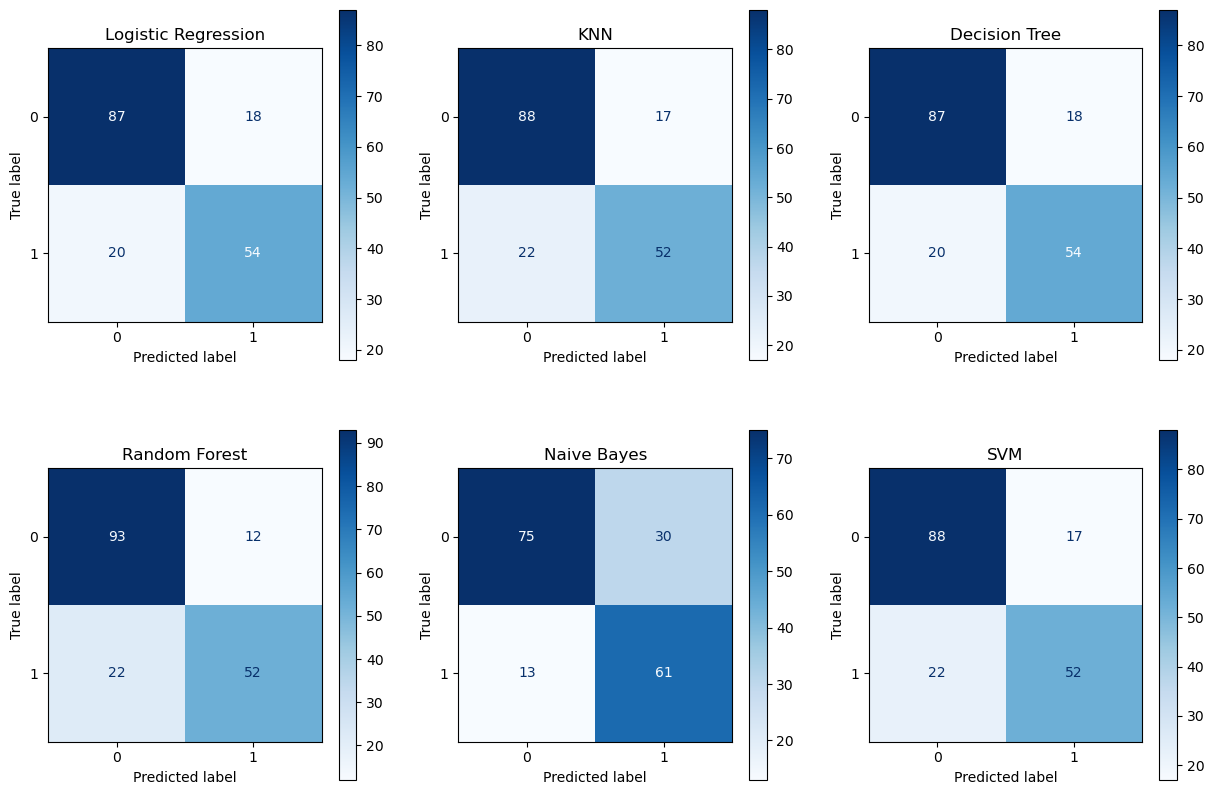

In [22]:
"""
Função que treina e efetua previsões.
Por default, recebe X_train, y_train, X_test, y_test. Apenas se passa outros parâmetros, se for necessário aplicar a outras variáveis;
Se não for passado argumento, assume o default (ver exemplo abaixo).
"""

train_and_predict()

## Tuning

In [23]:
def perform_search(params, method, model,X_train = X_train, y_train = y_train):
    if len(params) == 0 or (method not in ["grid", "random"]):
        raise ValueError("Erro. Argumentos: <param grid>, <method (grid/random)>, <X_train, y_train (opcionais)>.")
        
    if method == 'grid':
        clf = GridSearchCV(estimator=model, param_grid=params, cv=5)
        clf.fit(X_train, y_train)
        return clf.best_params_
    elif method == 'random':
        n_iter = params.pop('n_iter')
        best_score = float('-inf')
        best_params = {}
        for i in range(n_iter):
            params_temp = {}
            for key_train, value in params.items():
                params_temp[key_train] = random.choice(value)
            clf = model.fit(X_train, y_train, **params_temp)
            score = clf.score(X_train, y_train)
            if score > best_score:
                best_score = score
                best_params = params_temp
        return best_params
    else:
        raise ValueError('Invalid method. Choose either "grid" or "random".')

In [25]:
# Alterar consoante necessidade
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

method = "grid" # alterar consoante necessidade
model = RandomForestClassifier(random_state=42) # alterar para o modelo desejado

print("\033[93m{}\033[00m".format(f"Realizando {method}-search:\n"))
perform_search(params, method, model)

Realizando grid-search:



{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}